# Data Generator - Customer Purchases Dataset

This notebook generates the sample dataset for Assignment 4.

**Run this once to create `data/customer_purchases.csv`**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(217)  # For reproducibility

In [2]:
# Generate sample customer purchase data
n_records = 15000  # 100x larger dataset

data = {
    'purchase_id': [f'P{i:05d}' for i in range(1, n_records + 1)],
    'customer_id': np.random.choice([f'C{i:04d}' for i in range(1, 501)], n_records),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Sports'], n_records),
    'product_name': np.random.choice([
        'Laptop', 'Smartphone', 'Headphones', 'Tablet', 'Monitor',
        'T-Shirt', 'Jeans', 'Jacket', 'Shoes', 'Hat',
        'Plant Pot', 'Garden Tools', 'Lamp', 'Rug', 'Cushion',
        'Novel', 'Cookbook', 'Magazine', 'Textbook',
        'Yoga Mat', 'Dumbbells', 'Tennis Racket', 'Basketball', 'Running Shoes'
    ], n_records),
    'quantity': np.random.choice([1, 2, 3, 4, 5], n_records),
    'price_per_item': np.round(np.random.uniform(9.99, 499.99, n_records), 2),
    'purchase_date': [(datetime(2024, 1, 1) + timedelta(days=int(x))).strftime('%Y-%m-%d') 
                      for x in np.random.uniform(0, 365, n_records)],
    'customer_state': np.random.choice(['CA', 'NY', 'TX', 'FL', 'WA', 'IL'], n_records),
    'shipping_method': np.random.choice(['Standard', 'Express', 'Overnight'], n_records)
}

df = pd.DataFrame(data)

# Introduce some missing values (realistic scenario)
# About 4% missing values in quantity and shipping_method
n_missing = int(n_records * 0.04)
missing_indices = np.random.choice(df.index, size=n_missing * 2, replace=False)
df.loc[missing_indices[:n_missing], 'quantity'] = np.nan
df.loc[missing_indices[n_missing:], 'shipping_method'] = np.nan

# Show sample
print(f"Generated {len(df):,} records")
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nFirst few rows:")
df.head(10)

Generated 15,000 records

Missing values:
purchase_id           0
customer_id           0
product_category      0
product_name          0
quantity            600
price_per_item        0
purchase_date         0
customer_state        0
shipping_method     600
dtype: int64

First few rows:


,purchase_id,customer_id,product_category,product_name,quantity,price_per_item,purchase_date,customer_state,shipping_method
0,P00001,C0147,Books,Shoes,1.0,451.68,2024-08-12,IL,Overnight
1,P00002,C0061,Home & Garden,Hat,1.0,352.84,2024-03-29,WA,Standard
2,P00003,C0394,Home & Garden,T-Shirt,4.0,120.66,2024-07-11,FL,Standard
3,P00004,C0343,Sports,Yoga Mat,2.0,374.80,2024-09-08,CA,Standard
4,P00005,C0022,Books,Rug,5.0,311.48,2024-06-28,NY,Express
5,P00006,C0121,Electronics,Basketball,3.0,31.62,2024-08-28,CA,Overnight
6,P00007,C0054,Sports,Plant Pot,4.0,312.80,2024-01-12,IL,Express
7,P00008,C0027,Home & Garden,Monitor,2.0,309.13,2024-04-11,IL,Standard
8,P00009,C0430,Books,Garden Tools,3.0,308.69,2024-09-23,TX,Express
9,P00010,C0097,Home & Garden,Jacket,1.0,210.79,2024-04-16,FL,Overnight


In [3]:
# Save to CSV
df.to_csv('data/customer_purchases.csv', index=False)
print(f"✓ Saved {len(df):,} records to data/customer_purchases.csv")
print(f"  File size: {len(df.to_csv(index=False)) / 1024:.1f} KB")

✓ Saved 15,000 records to data/customer_purchases.csv
  File size: 945.1 KB


## Dataset Preview & Summary Statistics

This section shows some analysis techniques you'll learn later in the course!

In [4]:
# Summary statistics
print("=== NUMERIC COLUMN SUMMARY ===")
df.describe()

=== NUMERIC COLUMN SUMMARY ===


,quantity,price_per_item
count,14400.000000,15000.000000
mean,3.005000,253.517283
std,1.416658,141.440121
min,1.000000,10.090000
25%,2.000000,130.582500
50%,3.000000,254.580000
75%,4.000000,375.612500
max,5.000000,499.960000


In [5]:
# Category distributions
print("=== PRODUCT CATEGORIES ===")
df['product_category'].value_counts()

=== PRODUCT CATEGORIES ===


product_category
Electronics      3017
Books            3012
Home & Garden    2998
Sports           2987
Clothing         2986
Name: count, dtype: int64

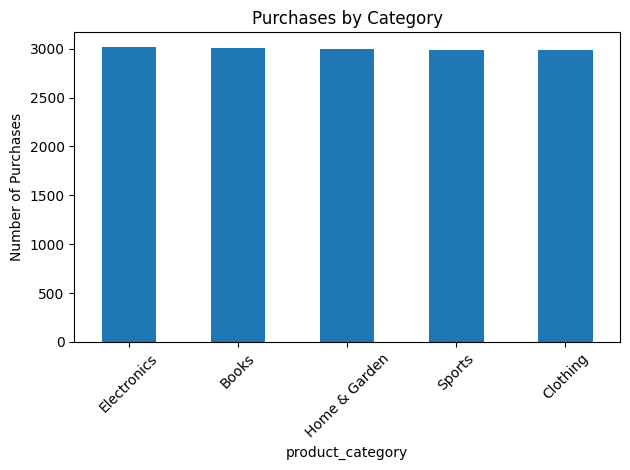

In [6]:
# Preview: Simple visualization (you'll learn this in Lecture 9!)
import matplotlib.pyplot as plt

df['product_category'].value_counts().plot(kind='bar', title='Purchases by Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

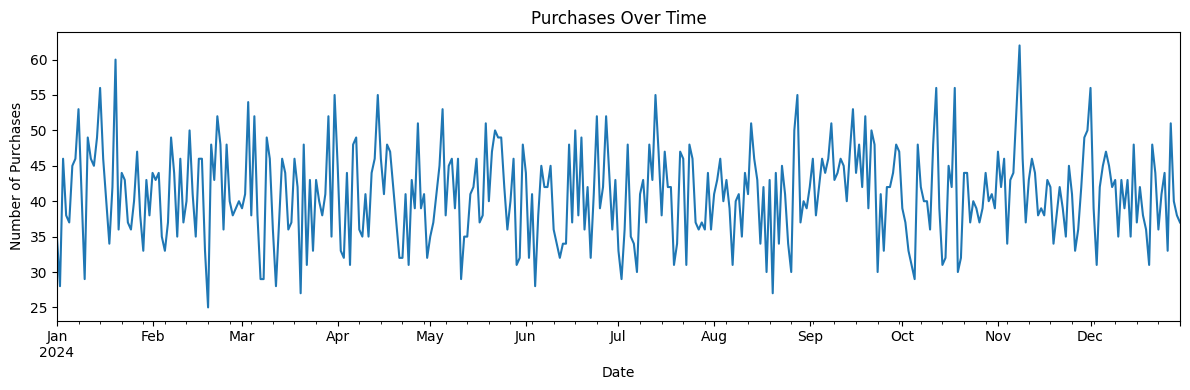

In [7]:
# Preview: Time series (Lecture 11!)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
daily_purchases = df.groupby('purchase_date').size()

plt.figure(figsize=(12, 4))
daily_purchases.plot(title='Purchases Over Time')
plt.ylabel('Number of Purchases')
plt.xlabel('Date')
plt.tight_layout()
plt.show()